In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

import warnings

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=FutureWarning)

##### 1、读取数据 

In [3]:
names = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度','花型']
path = './datas/iris.data'
data = pd.read_csv(path, header=None, names = names)
data.head()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,花型
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### 2、数据处理

In [4]:
x_prime = data[names[:-1]]
y = data[names[-1]]
y = pd.Categorical(y).codes

print("总样本数目：%d;特征属性数目:%d" % x_prime.shape)

总样本数目：150;特征属性数目:4


##### 进行特征比较
—— np.count_nonzero(x == y) 返回值为True（或不为零）的元素的 下标 组成的元组列表

特征：   花萼长度  +  花萼宽度
	预测正确的数目： 127
	准确率: 84.67%
特征：   花萼长度  +  花瓣长度
	预测正确的数目： 148
	准确率: 98.67%
特征：   花萼长度  +  花瓣宽度
	预测正确的数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣长度
	预测正确的数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确的数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确的数目： 149
	准确率: 99.33%


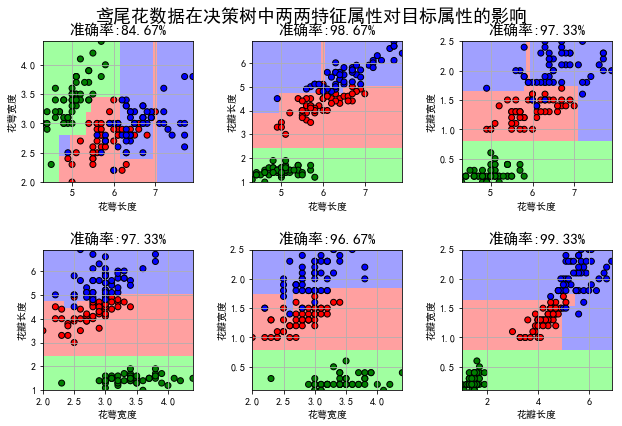

In [71]:
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]   # 进行特征组合，用组合特征来进行决策树模型训练

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    
plt.figure(figsize=(9, 6), facecolor='w')
for i, pair in enumerate(feature_pairs):

    x = x_prime[x_prime.columns[pair]]   # 每次获取两列数据

    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    clf.fit(x, y)   # 用组合特征来训练模型
    
    y_predict = clf.predict(x)
    score = clf.score(x, y)
    
    print ('特征：  ', names[pair[0]], ' + ', names[pair[1]])
    print ('\t预测正确的数目：', np.count_nonzero(y_predict == y))
    print ('\t准确率: %.2f%%' % (score*100))   # /t 是制表符

    # ——————————————————————————————————————
    N = 500  # 横纵各采样值
    x1_min, x2_min = x.min()   # DataFrame数据默认按列处理
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, N)
    grid_x, grid_y = np.meshgrid(t1, t2)  # 生成网格采样点
    flat_x = np.stack((grid_x.ravel(), grid_y.ravel()),axis = 1)  # 生成测试点
    
    flat_y = clf.predict(flat_x)  # 生成预测值
    grid_label = flat_y.reshape(grid_x.shape)  
    
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(grid_x, grid_y, grid_label, cmap=cm_light)  # 分类图
    plt.scatter(x[names[pair[0]]], x[names[pair[1]]], c=y, edgecolors='k', cmap=cm_dark)  # 训练集样本点分类
    
    plt.xlabel(names[pair[0]], fontsize=10)
    plt.ylabel(names[pair[1]], fontsize=10)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
    plt.title('准确率:%.2f%%' % (score * 100), fontdict={'fontsize':15})
    
plt.suptitle('鸢尾花数据在决策树中两两特征属性对目标属性的影响', fontsize=18, y = 1)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()